In [59]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import matplotlib.gridspec as gridspec
from matplotlib import ticker
plt.rcParams['axes.unicode_minus']=False
mpl.rcParams['text.usetex'] = False
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']
mpl.rcParams['font.family'] = 'helvetica'


<ipython-input-59-d83ac6445e14>:10: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [


In [60]:
width_bot_elec = 200 #nn
width_top_elec = 200 #nm
dist_cruc = 650 #mm
origin_trans = 62.5 #mm  This is the distance by which the origin of the wafer gets translated when tilted, because tilt axis is not in wafer plane
radius_wafer = 50 #mm
heigt_resist_bot = 200 #nm
height_resist_top = 600 #nm
bot_electrode = 35 #nm
top_electrode = 75 #nm
offset = 25 # nm
tilt = 7*np.pi/36
dist_cruc_actual = dist_cruc*np.cos(tilt) - origin_trans

x =  np.linspace(-radius_wafer, radius_wafer, num=100)
y =  np.linspace(-radius_wafer, radius_wafer, num=100)

x_surf, y_surf = np.meshgrid(x, y)

distance = np.sqrt((x_surf**2+y_surf**2))
levels = 100

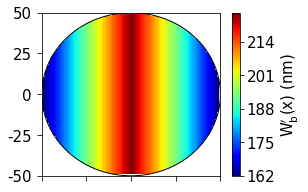

In [102]:
fig, ax = plt.subplots(figsize=(4,3))
x_actual = width_bot_elec + offset - height_resist_top*abs(x_surf)/dist_cruc_actual
levels = np.linspace(160,220,100)
masked_x_actual =  np.ma.masked_where(distance > 50, x_actual)
isn_x_actual = np.isnan(masked_x_actual)
x_actual_dropna = masked_x_actual[~isn_x_actual]
x_actual_reshape = x_actual_dropna.reshape(-1,100)
plot_x_actual = ax.contourf(x_surf, y_surf, x_actual_reshape, 100, cmap='jet')


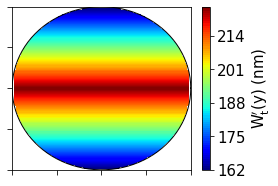

In [128]:
fig, ax = plt.subplots(figsize=(4,3))
y_actual = width_top_elec + offset - height_resist_top*abs(y_surf)/dist_cruc_actual
masked_y_actual =  np.ma.masked_where(distance > 50, y_actual)
isn_y_actual = np.isnan(masked_y_actual)
y_actual_dropna = masked_y_actual[~isn_y_actual]
y_actual_reshape = y_actual_dropna.reshape(-1,100)
plot_y_actual = ax.contourf(x_surf, y_surf, y_actual_reshape, 100, cmap='jet')

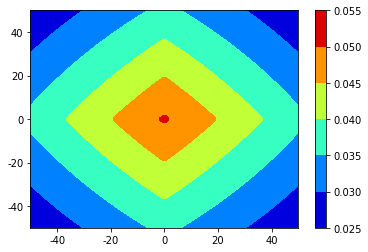

In [5]:
np.set_printoptions(threshold=sys.maxsize)
fig, ax = plt.subplots()
area_simple = np.multiply(x_actual, y_actual)
plot_simple = ax.contourf(x_surf,y_surf,area_simple/10**6, 5, cmap='jet')
cbar = fig.colorbar(plot_simple)

In [7]:
r = (x_surf,y_surf,0)
C = (0, dist_cruc*np.sin(tilt), dist_cruc_actual)

vec_r = np.array(r, dtype=object)
vec_C = np.array(C, dtype=object)
f = np.linalg.norm(vec_r - vec_C) # vector magnitude
num = ((dist_cruc - origin_trans)**2*dist_cruc_actual)/f**3
thick_bot_elec_real = bot_electrode*num

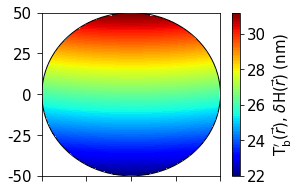

In [110]:
fig, ax  = plt.subplots(figsize=(4,3))
masked_thick_bot =  np.ma.masked_where(distance > 50, thick_bot_elec_real)
isn_thick_bot = np.isnan(masked_thick_bot)
thick_bot_dropna = masked_thick_bot[~isn_thick_bot]
thick_bot_reshape = thick_bot_dropna.reshape(-1,100)
plot_thick_bot = ax.contourf(x_surf, y_surf, thick_bot_reshape, 100, cmap='jet')


Sidewall contribution

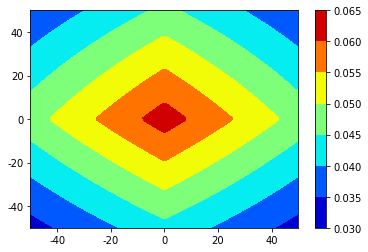

In [10]:
# A_overlap =  W'x + 2Tb'*W'y
fig, ax = plt.subplots()
# area_sidewall =  np.outer(2*thick_bot_elec_real,(width_top_elec + offset  - height_resist_top*abs(y)/dist_cruc_actual))
# area_2 = area_simple + area_sidewall
area_sidewall = np.multiply((x_actual + 2*thick_bot_elec_real),
                (y_actual))
plot_sidewall = ax.contourf(x_surf,y_surf,area_sidewall/10**6, 5, cmap='jet')
cbar = fig.colorbar(plot_sidewall)

W_lip

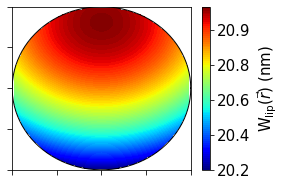

In [117]:
term_1 = (dist_cruc - origin_trans)**2
term_2 = dist_cruc*np.sin(tilt) - y_surf
term_3 = (term_1*term_2)/f**3
W_lip = bot_electrode*term_3


In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
masked_W_lip =  np.ma.masked_where(distance > 50, W_lip)
isn_W_lip = np.isnan(masked_W_lip)
W_lip_dropna = masked_W_lip[~isn_W_lip]
W_lip_reshape = W_lip_dropna.reshape(-1,100)
plot_W_lip = ax.contourf(x_surf, y_surf, W_lip_reshape, 100, cmap='jet')

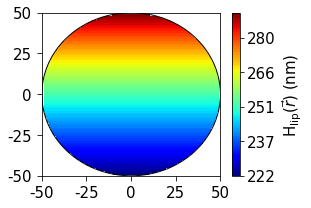

In [129]:
H_lip = (dist_cruc_actual*width_top_elec)/term_2
fig, ax = plt.subplots(figsize=(4,3))
masked_H_lip =  np.ma.masked_where(distance > 50, H_lip)
isn_H_lip = np.isnan(masked_W_lip)
H_lip_dropna = masked_H_lip[~isn_H_lip]
H_lip_reshape = H_lip_dropna.reshape(-1,100)
levels = 100
plot_H_lip = ax.contourf(x_surf, y_surf, H_lip_reshape, levels, cmap='jet')

Narrowing of top electrode

In [14]:
height_resist_top_mod = height_resist_top + thick_bot_elec_real
H_lip_mod = H_lip + thick_bot_elec_real


b = W_lip + height_resist_top_mod*np.abs(y_surf)/dist_cruc_actual
c = np.maximum(height_resist_top_mod*np.abs(y_surf)/dist_cruc_actual, W_lip + H_lip_mod*np.abs(y_surf)/dist_cruc_actual)
W_prime_top = (width_top_elec + offset)*np.ones(b.shape)

W_actual_top = np.zeros(b.shape)
W_actual_top[50:,:] = W_prime_top[50:,:] - b[50:,:] # y>0
W_actual_top[:50,:] = W_prime_top[:50,:] - c[:50,:] # y<0

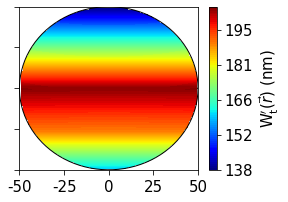

In [125]:
fig, ax = plt.subplots(figsize=(4,3))
masked_W_actual_top =  np.ma.masked_where(distance > 50, W_actual_top)
isn_W_actual_top = np.isnan(masked_W_actual_top)
W_actual_top_dropna = masked_W_actual_top[~isn_W_actual_top]
W_actual_top_reshape = W_actual_top_dropna.reshape(-1,100)
levels = 100
plot_W_actual_top = ax.contourf(x_surf, y_surf, W_actual_top_reshape, levels, cmap='jet')


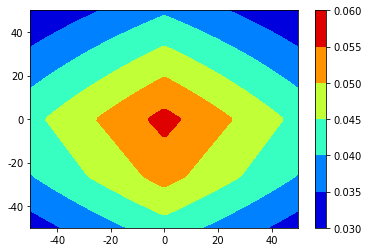

In [16]:
fig, ax = plt.subplots()
area_narrowtop = np.multiply((x_actual + 2*thick_bot_elec_real), W_actual_top)

In [17]:
distance = np.sqrt((x_surf**2+y_surf**2))
# area_simple = np.ma.masked_where(distance > 50, area_simple)
# area_total = np.ma.masked_where(distance > 50, area_total)
norm_conductance = 1 # S/nm2

masked_simple =  np.ma.masked_where(distance > 50, area_simple )
masked_sidewall =  np.ma.masked_where(distance > 50, area_sidewall )
masked_narrowtop = np.ma.masked_where(distance > 50, area_narrowtop) 

isn_simple = np.isnan(masked_simple)
isn_sidewall = np.isnan(masked_sidewall)
isn_narrowtop = np.isnan(masked_narrowtop)

norm_simple_dropna = masked_simple[~isn_simple]
norm_sidewall_dropna = masked_sidewall[~isn_sidewall]
norm_narrowtop_dropna = masked_narrowtop[~isn_narrowtop]


norm_simple = masked_simple/np.average(masked_simple)
norm_sidewall = masked_sidewall/np.average(masked_sidewall)
norm_narrowtop = masked_narrowtop/np.average(masked_narrowtop)
